# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

----

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [2]:
customers = pd.read_csv('Ecommerce Customers')

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


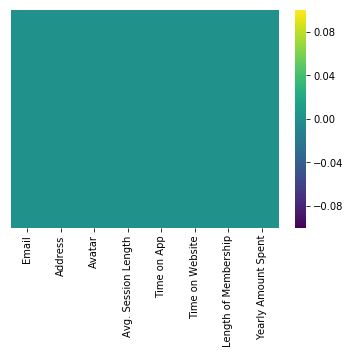

In [6]:
sns.heatmap(customers.isnull(), yticklabels = False, cmap = 'viridis')

We observe no missing data in this dataset, which makes our job very easy. 

Without any cleaning to perform, we're able to move on to the EDA component of this project.

## Exploratory Data Analysis
** *Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.* **

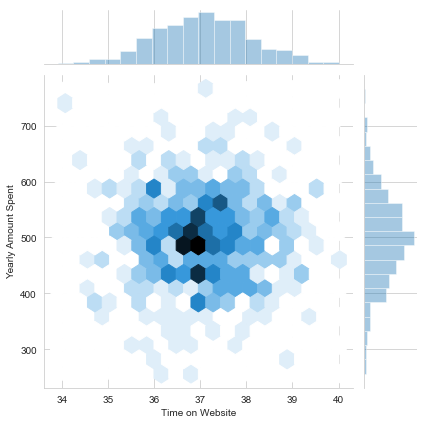

In [7]:
sns.set_style('whitegrid')

sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = customers, kind = 'hex')

In [8]:
np.corrcoef(x = customers['Time on Website'], y = customers['Yearly Amount Spent'])[0,1]

-0.0026408446721589104

Obstensibly, these variables have no statistical relationship. Since our eventual linear model will be regressing on **"Yearly Amount Spent"** it's valid to assert that the amount of time a shopper spends on the website is not a strong predictor of how much they spend annually. 

----

** *Do the same but with the Time on App column instead.* **

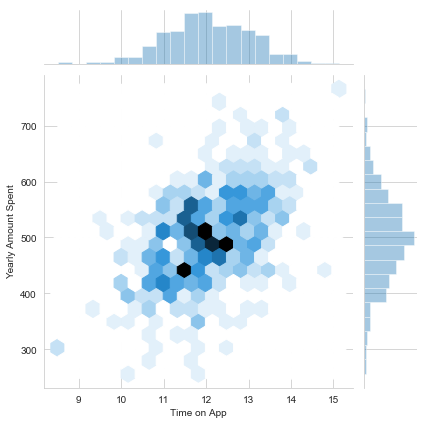

In [9]:
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = customers, kind = 'hex')

In [10]:
np.corrcoef(x = customers['Time on App'], y = customers['Yearly Amount Spent'])[0,1]

0.49932777005345047

We observe a *much* stronger relationship between time spent on the mobile app and yearly amount spent at the boutique. A correlation coefficient of **0.499** is moderately strong, which suggests that time on the app may be a robust predictor of annual spending.

----

** *Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.* **

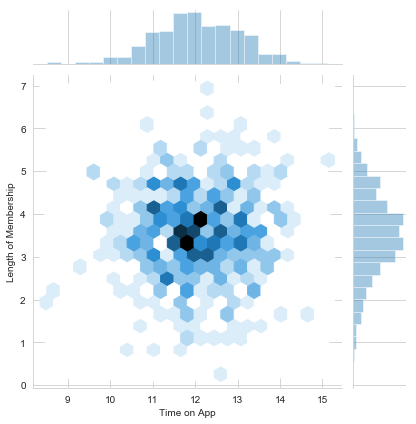

In [11]:
sns.jointplot(x = 'Time on App', y = 'Length of Membership', data = customers,
             kind = 'hex')

In [12]:
np.corrcoef(x = customers['Time on App'], y = customers['Length of Membership'])[0,1]

0.02914256313615853

Again, this relationship doesn't appear to be very robust. It's possible that both variables significantly predict **"Yearly Amount Spent"** but do not correlate with each other; best-case scenario, we can rule out any multicollinearity between these variables.

----

*Let's explore these types of relationships across the entire data set.*

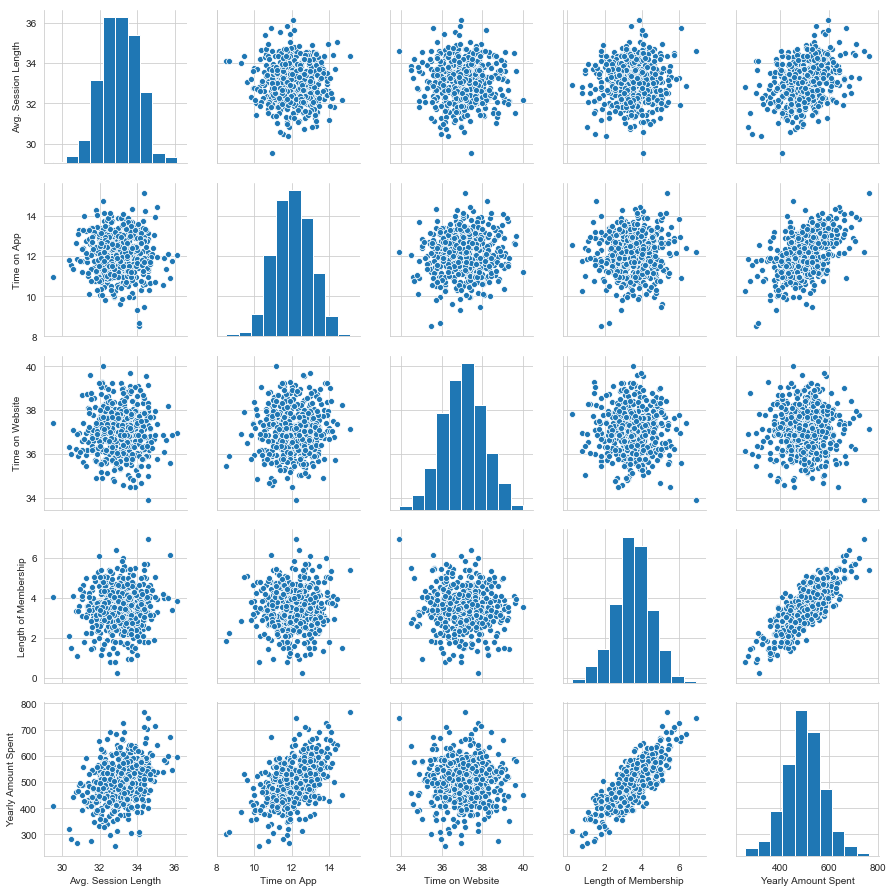

In [13]:
sns.pairplot(customers)

The responses to each of these variables appear to be mostly normally distributed - this suggests that are few (if any) statistical outliers in this sample.

---

*Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?*

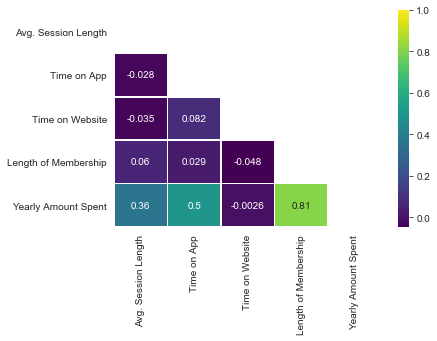

In [14]:
c_mask = np.zeros_like(customers.corr(), dtype = np.bool)
c_mask[np.triu_indices_from(c_mask)] = True

hm = sns.heatmap(customers.corr(), linewidths = 0.6, cmap = 'viridis', annot = True, mask = c_mask)

With a correlation coefficient of 0.81, it's observed that **Length of Membership** has the highest correlation with Yearly Amount Spent. We should expect this variable to be a significant predictor in our linear model.

----

** *Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.* **

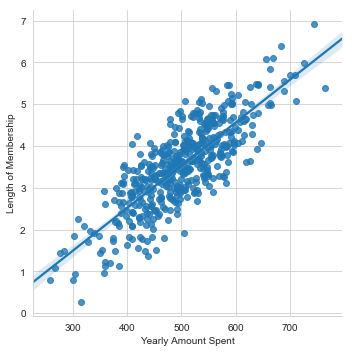

In [15]:
sns.lmplot(x = 'Yearly Amount Spent', y = 'Length of Membership', data = customers)

As we observed above, the correlation coefficient for this relationship is **0.81**, which is quite strong. This is reflected in the plot above, as increases in annual spending correlate beautifully with the length of shoppers' membership.

----

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. <br> <br>
** *Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.* **

In [16]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [17]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers[['Yearly Amount Spent']]

In [18]:
from sklearn.model_selection import train_test_split

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

## Training the Model

Now its time to train our model on our training data!

** *Import LinearRegression from sklearn.linear_model* **

In [20]:
from sklearn.linear_model import LinearRegression

***Create an instance of a LinearRegression() model named lm.***

In [21]:
lm = LinearRegression()

***Train/fit lm on the training data.***

In [22]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

***Print out the coefficients of the model***

In [23]:
print(lm.coef_)

[[25.69154034 37.89259966  0.56058149 61.64859402]]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [24]:
prediction = lm.predict(X_test)

** *Create a scatterplot of the real test values versus the predicted values.* **

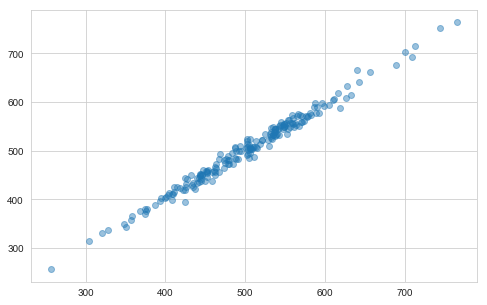

In [25]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, prediction, alpha = 0.45)

Pretty as a picture! Our linear regression model has done an excellent job predicting annual spending at the clothing store based on individuals' online and mobile shopping behavior. We observe no obvious statistical outliers, as the fitted points fall cleanly in line with the real test points.

----

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** *Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas* **

In [27]:
from sklearn import metrics

print('MAE:\t' + str(metrics.mean_absolute_error(y_test, prediction)))
print('MSE:\t' + str(metrics.mean_squared_error(y_test, prediction)))
print('RMSE:\t' + str(np.sqrt(metrics.mean_squared_error(y_test, prediction))))

MAE:	7.74267128583871
MSE:	93.83297800820048
RMSE:	9.686742383701576


In [49]:
customers["Yearly Amount Spent"].mean()

499.31403825859053

Contextualizing our RMSE value as **9.68 dollars** provides support for the predictive efficacy of our model. 9.68 USD is a very low amount of error - especially considering the average annual spending in this sample is 499.31 USD. This value suggests that our linear regression model would fit well on out-of-sample data.

----

## Residuals
*Plot a histogram of the residuals and make sure it looks normally distributed.*

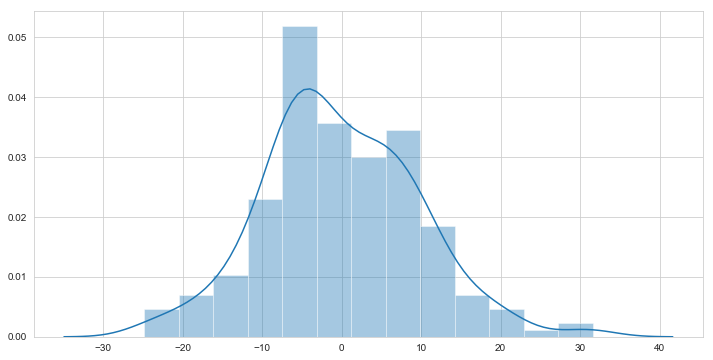

In [31]:
residuals = y_test - prediction

plt.figure(figsize=(12,6))
sns.distplot(residuals)

This distribution is nearly bimodal, but does not show excessive skewness. Given that the distribution is close to 0 - albeit approximately - and that there are no obvious outliers, we can place trust in this model to facilitate reliable results.

----

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

In [29]:
cdf = pd.DataFrame(lm.coef_.reshape(4,1), X.columns, columns = ['Coefficients'])

cdf

,Coefficients
Avg. Session Length,25.691540
Time on App,37.892600
Time on Website,0.560581
Length of Membership,61.648594


** *How can you interpret these coefficients?* **

**Answer:** Essentially, the coefficients in this model suggest the degree of effect size that the variable is having on our DV (annual spending, in this context). Congruent with our assessment in the EDA component of this project, the time spent on the website appears to have barely any effect on the amount that customers spend at the retailer.

** *Do you think the company should focus more on their mobile app or on their website?* **

**Answer:** It's clear and obvious that time spent on the mobile application is more predictive of consumer trends than time spent on the website. The company should invest in the app to maximize its functionality and user-friendliness.

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.